# 16 - Ordinary differential equations Daniel Teeuwsen

#### Excercise 1
Copy the RK2 method from the lectur notebook and modify it to solve the same problem with the RK4 method.

In [2]:
import numpy as np
import scipy.integrate
%matplotlib inline
import matplotlib.pyplot as plt

RK2:  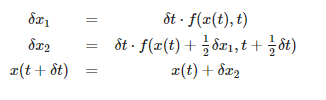   

RK4:  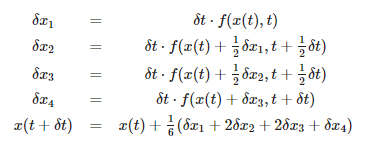

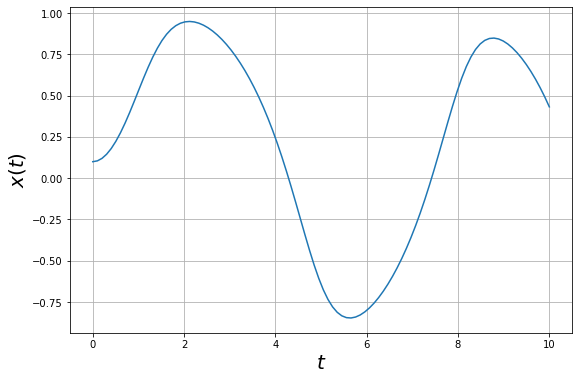

In [3]:
def f(x,t):
    return -x**3+np.sin(t)

t0 = 0.0
t1 = 10.0
N  = 100
x0 = 0.1

tpoints, dt = np.linspace(t0,t1,N,retstep=True)
xpoints=[]

x = x0
for t in tpoints :
    xpoints.append(x)
    x1 = dt*f(x,t)
    x2 = dt*f(x+x1/2,t+dt/2)
    x3 = dt*f(x+x2/2,t+dt/2)
    x4 = dt*f(x+x3,t+dt)
    x  = x+(1/6)*(x1+2*x2+2*x3+x4)
    
plt.figure(figsize=(9,6))
plt.plot(tpoints,xpoints)
plt.xlabel(r"$t$",fontsize=20)
plt.ylabel(r"$x(t)$",fontsize=20)
plt.grid()
plt.show()
plt.close()

#### Excercise 2

Consider this simple circuit 
<img width=256 src="./lowpass.png"/>
This circuit acts as a low-pass filter for $V_{in}$. 

Using Ohm's law and the capacitor law and assuming that the output load has very high impedance, so that a negligible amount of current flows through it, we can write down the equations governing this circuit as follows.  Let $I$ be the current that flows through~$R$ and into the capacitor, and let $Q$ be the charge on the capacitor.  Then:
$$
IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = \dot{Q}.
$$
Substituting the second equation into the third, then substituting the result into the first equation, we find that 
$$
\dot{V_\textrm{out}} = \frac{1}{RC}\left( V_\textrm{in} - V_\textrm{out} \right).
$$

<font color="red">Use `scipy.inetgrate.solve_ivp` to solve the equation for $V_\textrm{out}(t)$ from $t=1\rightarrow10$ sec, and $V_\textrm{out}(t_0)=0.1$ V. </font>
    
Let $V_\textrm{in}$ be alternating current signal with noise; 
$$V_\textrm{in}(t)=\cos(2\pi f_0t)+0.1\cos(2\pi f_1t)+0.15\cos(2\pi f_2t)$$
where $f_0=0.5$ Hz is the fundamental signal frequency, and frequencies $f_1=10.2$ Hz, and $f_2=21.3$ Hz represent high frequency noise.  Plot both $V_\textrm{out}(t)$ and $V_\textrm{out}(t)$ on top of each other to see the smoothing.

Choose $RC$ in seconds such that the cutoff frequency $1/RC$ removes most of the noise. Remember, $V_\textrm{out}(t)$ is delayed by the time $RC$, the time it takes to charge and discharge the capacitor.

<div class="alert alert-block alert-info">
<b>Tip:</b>If you pack the constants into tuples like this:

```python
RC = 0.15
f0 = 0.5
f1 = 10.2
f2 = 21.3
frequencies  = (f0,f1,f2) 
constants = (RC,frequencies)
```
The you can unpack them like this:

```python
def Vin(t,args) :
    f0,f1,f2 = args
    ...
    return Vin
def f(Vout,t,args):
    RC,frequencies = args[0]
    ...Vin(t,frequencies)...
```
</div>

The solver successfully reached the end of the integration interval.


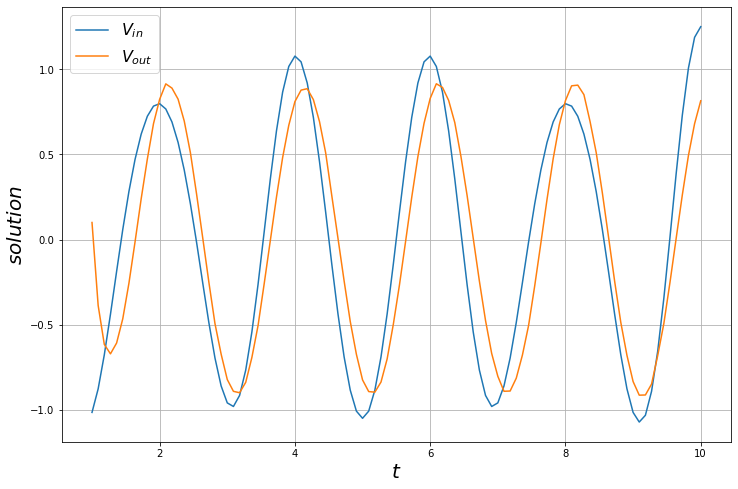

In [28]:
RC = 0.15
f0 = 0.5
f1 = 10.2
f2 = 21.3
frequencies = (f0,f1,f2)
constants = (RC,frequencies)

t0 = 1.0
t1 = 10.0
N  = 100
x0 = 0.1
tpoints = np.linspace(t0,t1,N)

def Vin(t,args):
    f0,f1,f2 = args
    return np.cos(2*np.pi*f0*t)+0.1*np.cos(2*np.pi*f1*t)+0.15*np.cos(2*np.pi*f2*t)

def f(t,Vout,args):
    RC, frequencies = args[0], args[1]
    return (1/RC)*(Vin(t,frequencies)-Vout)

solver = scipy.integrate.solve_ivp(f,[t0,t1],[x0],t_eval=tpoints,args=(constants,))

print(solver.message)

plt.figure(figsize=(12,8))
plt.plot(tpoints,Vin(tpoints,frequencies),label = r'$V_{in}$')
plt.plot(solver.t,solver.y[0], label = r'$V_{out}$')
plt.xlabel(r"$t$",fontsize=20)
plt.ylabel(r"$solution$",fontsize=20)
plt.legend(fontsize=16)
plt.grid()
plt.show()
plt.close()

#### Excercise 3

#### <font color="red">Solve either the Lotka-Volterra predator-prey equations, or the Kermack–McKendrick SIR infection equations.</font>

#### Lotka-Volterra equations
The [Lotka-Volterra equations][1] are a mathematical model of predator-prey interactions between biological species.  Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the
prey) and "foxes" (the predators).  You could think of $x$ and $y$ as being the population in thousands, say, so that $x=2$ means there are 2000 rabbits.  Strictly the only allowed values of $x$ and $y$ would then be multiples of 0.001, since you can only have whole numbers of rabbits or foxes.  But 0.001 is a pretty close spacing of values, so it's a good approximation to treat $x$ and $y$ as continuous real numbers so long as neither gets very close to zero.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:
$$\dot{x} = \alpha x - \beta xy$$
where $\alpha$ and $\beta$ are constants.  At the same time the foxes reproduce at a rate proportional the rate at which they eat rabbits, because they need food to grow and reproduce, but also die of old age at a rate proportional to their own population:
$$\dot{y} = \gamma xy - \delta y$$
where $\gamma$ and $\delta$ are also constants.

<font color="red">Solve these equations using the fourth-order Runge-Kutta method and `scipy.integrate.solve_ivp` for the case $\alpha=1$, $\beta=\gamma=0.5$, and  $\delta=2$, starting from the initial condition $x_0=y_0=2$.  Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t=0$ to $t=30$.  </font>

#### Kermack–McKendrick theory
The [Kermack–McKendrick theory][2] is a hypothesis that predicts the number and distribution of cases of an infectious disease as it is transmitted through a population over time. From the 1920s to the 1930s, these were the first [compartmental models][3] of infection spread, where the population is compartmentalized into the catagories of Susceptible, Infectious, or Recovered, hense the name SIR model.

$$\begin{array}{}
\dot{x} &=& -\beta xy\\
\dot{y} &=& \beta xy-\gamma y\\
\dot{z} &=& \gamma y
\end{array}$$
- Number of people still Susceptible : $x$
- Number of Infected people : $y$ 
- Number of people Recovered : $z$
- Infection rate : $\beta$
- Mean recovery rate : $\gamma$
- Epidemilogical constant : $\epsilon = \beta x /\gamma$
    - If $\epsilon > 1$, each person who gets the disease will infect more than one person, so the epidemic will spread.
    - If $\epsilon < 1$, each person who contracts the disease will infect fewer than one person before dying or recovering, so the outbreak will stop.
    - Time point where $\epsilon$ transitions from $>1$ to $<1$ is the day of peak number of infections.
    
<font color="red">Solve these equations using the fourth-order Runge-Kutta method and `scipy.integrate.solve_ivp. Play with different parameters, but show the case of a low infection rate such as $\beta=0.002$, and a fast recovery rate $\gamma=0.25$, a population of $x=1000$ and a single infected person $y=1$. Obviously, there are no recovered people at the start $z=0$. Model the infection over 20 days; from $t=0$ to $t=20$.  

Plot the cuves of the susceptiple, infected, and recovered populations. In a seperate plot, plot the epidemilogical constant $\epsilon$ as it evolves in time.
</font>

    
[1]:https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations
[2]:https://en.wikipedia.org/wiki/Kermack%E2%80%93McKendrick_theory
[3]:https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

<div class="alert alert-block alert-info">
<b>Tip:</b> Notice that the differential equations in this case do not depend explicitly on time $t$ - in vector notation, the right-hand side of each equation is a function $f(\mathbf{r})$ with no $t$ dependence.  You may still find it convenient to define  a Python function <tt>f(t,r)</tt> including the time variable, so that your  program takes the same form as programs given earlier.  You don't have to do it that way, but it can avoid some confusion.
</div>

<font color="blue">**Answer:**</font>  NOTE: Please mark the first one Lotka Volterra

The solver successfully reached the end of the integration interval.


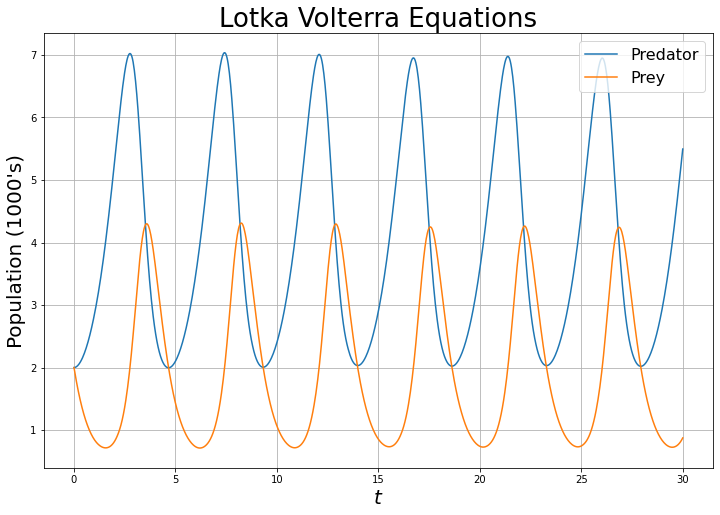

In [39]:
## Lotka Volterra Equations: ##

alpha = 1.0
beta  = 0.5
gamma = 0.5
delta = 2.0
constants = (alpha,beta,gamma,delta)

x0 = 2.0
y0 = 2.0
t0 = 0.0
t1 = 30.0
N  = 1000

tpoints = np.linspace(t0,t1,N)

def LV_system_eqns(t,my_vars,args):                       # my_vars array [x,y] 
    alpha, beta, gamma, delta = args
    xdot = alpha*my_vars[0]-beta*my_vars[0]*my_vars[1]
    ydot = gamma*my_vars[0]*my_vars[1]-delta*my_vars[1]
    return xdot, ydot 

solver = scipy.integrate.solve_ivp(LV_system_eqns,[t0,t1],[x0,y0],method='RK45',t_eval=tpoints,args=(constants,))
print(solver.message)

plt.figure(figsize=(12,8))
plt.plot(tpoints,solver.y[0], label = 'Predator')
plt.plot(tpoints,solver.y[1], label = 'Prey')
plt.xlabel(r"$t$",fontsize=20)
plt.ylabel("Population (1000's)",fontsize=20)
plt.legend(fontsize=16)
plt.title('Lotka Volterra Equations', fontsize=26)
plt.grid()
plt.show()
plt.close()

The solver successfully reached the end of the integration interval.


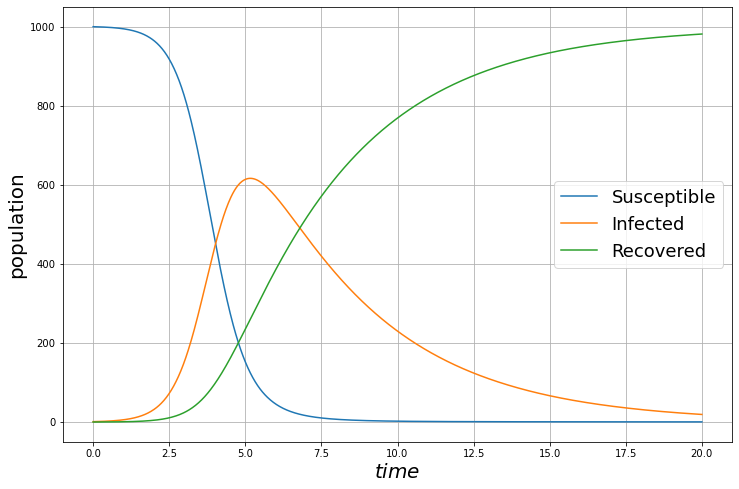

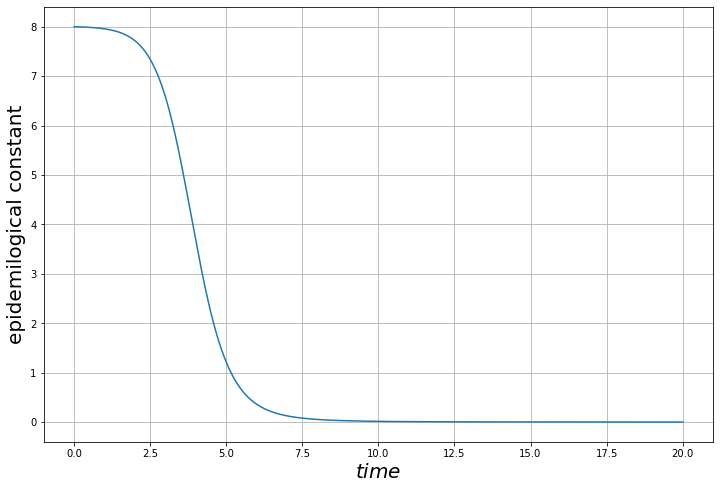

In [48]:
## SIR model ##     (Just for fun)

beta  = 0.002
gamma = 0.25
constants = (beta,gamma)

x0 = 1000
y0 = 1
z0 = 0
initial_conditions = (x0,y0,z0)

N  = 1000
t0 = 0.
t1 = 20.
interval = [t0,t1]
tpoints = np.linspace(t0,t1,N)

def sir_model(t,my_vars,args):
    
    beta, gamma = args
    
    x = my_vars[0]
    y = my_vars[1] 
    z = my_vars[2] 
    
    xdot = -beta*x*y 
    ydot = beta*x*y-gamma*y
    zdot = gamma*y
    
    return xdot,ydot,zdot

solver = scipy.integrate.solve_ivp(sir_model,interval,initial_conditions,method='RK45',t_eval=tpoints,args=(constants,))
print(solver.message)

plt.figure(figsize=(12,8))
plt.plot(tpoints,solver.y[0], label = 'Susceptible')
plt.plot(tpoints,solver.y[1], label = 'Infected')
plt.plot(tpoints,solver.y[2], label = 'Recovered')
plt.legend(fontsize=18)
plt.xlabel(r"$time$",fontsize=20)
plt.ylabel("population",fontsize=20)
plt.grid()
plt.show()
plt.close()

plt.figure(figsize=(12,8))
plt.plot(tpoints,beta*solver.y[0]/gamma)
plt.xlabel(r"$time$",fontsize=20)
plt.ylabel("epidemilogical constant",fontsize=20)
plt.grid()
plt.show()
plt.close()

#### Excercise 4

One of the most celebrated sets of differential equations in physics is the <a href="https://en.wikipedia.org/wiki/Lorenz_system">Lorenz equations</a>:
$$\dot{x} = \sigma(y-x),\qquad \dot{y} = \rho x - y - xz,\qquad\dot{z} = xy - \beta z,$$
where $\sigma$, $\rho$, and $\beta$ are constants.  

These equations were first studied by Edward Lorenz in 1963, who derived them from a simplified model of weather patterns.  The reason for their fame is that they were one of the first incontrovertible examples of *deterministic chaos*, the occurrence of apparently random motion even though there is no randomness built into the equations. We encountered a different example of chaos in the logistic map earlier.

<font color="red">Write a program to solve the Lorenz equations for the case $\sigma=10$, $\rho=28$, and $\beta=8/3$ in the range from $t=0$ to $t=50$ with initial conditions $(x,y,z)=(0,1,0)$.  </font>

   * DO NOT COPY THE CODE FROM THE WIKIPEDIA PAGE. You must use `scipy.integrate.solve_ivp` instead,and really. It is a small change to the program for the Lotka-Volterra equations.
   
   * Print the message from `scipy.integrate.solve_ivp` to make sure that there were no errors.

   * Have your program make a plot of $y$ as a function of time.  Note the unpredictable nature of the motion.  
   
   * Add to your program to produce a plot of $z$ against $x$.  You should see a picture of the famous *strange attractor* of the Lorenz equations, a lop-sided butterfly-shaped plot that never repeats itself.
   
   
<p><a href="https://commons.wikimedia.org/wiki/File:A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif#/media/File:A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif"><img src="https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif" alt="A Trajectory Through Phase Space in a Lorenz Attractor.gif"></a><br>By <a href="//commons.wikimedia.org/w/index.php?title=User:Danbquinn&amp;action=edit&amp;redlink=1" class="new" title="User:Danbquinn (page does not exist)">Dan Quinn</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=29370723">Link</a></p>

The solver successfully reached the end of the integration interval.


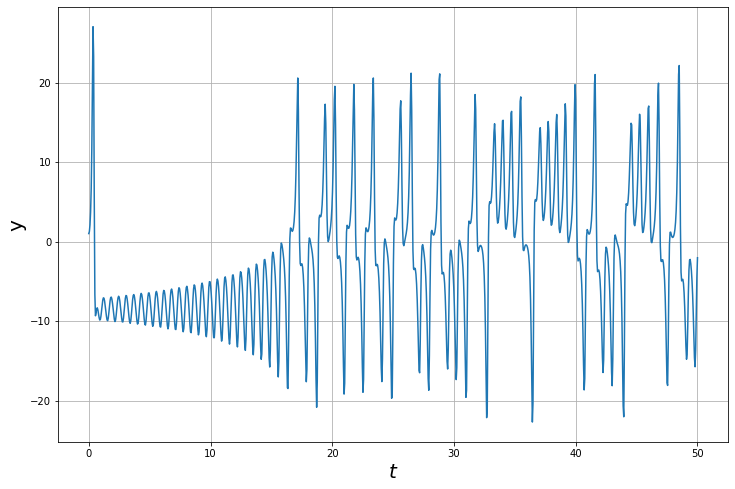

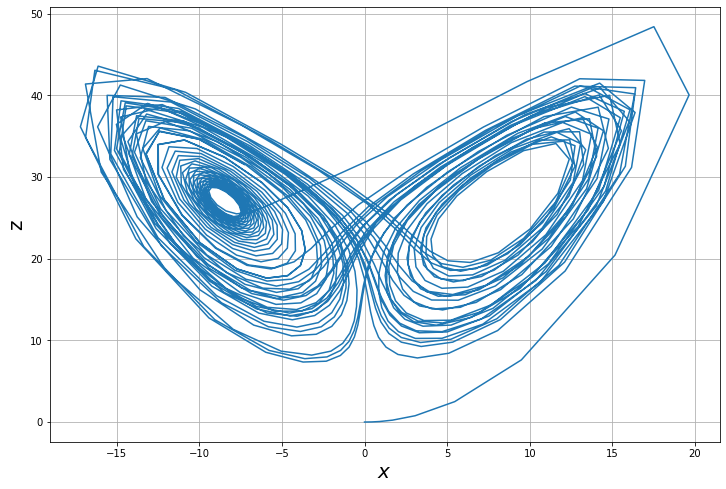

In [45]:
## Lorenz Equations ##

sigma = 10
rho   = 28
beta  = 8/3
constants = (sigma,rho,beta)

N  = 1000
t0 = 0.
t1 = 50.
interval = [t0,t1]
tpoints = np.linspace(t0,t1,N)

x0 = 0
y0 = 1
z0 = 0
initial_conditions = (x0,y0,z0)

def lorenz_eqns(t,my_vars,args):
    
    sigma,rho,beta = args
    
    x = my_vars[0] 
    y = my_vars[1] 
    z = my_vars[2] 
    
    xdot = sigma*(y-x)
    ydot = rho*x-y-x*z
    zdot = x*y-beta*z
    
    return xdot, ydot, zdot
    
solver = scipy.integrate.solve_ivp(lorenz_eqns,interval,initial_conditions,method='RK45',t_eval=tpoints,args=(constants,))
print(solver.message)

plt.figure(figsize=(12,8))
plt.plot(tpoints,solver.y[1])
plt.xlabel(r"$t$",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.grid()
plt.show()
plt.close()

plt.figure(figsize=(12,8))
plt.plot(solver.y[0],solver.y[2])
plt.xlabel(r"$x$",fontsize=20)
plt.ylabel("z",fontsize=20)
plt.grid()
plt.show()
plt.close()